
<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# HOLZ Lines

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Diffraction/CH2_11-HOLZ_Lines.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Diffraction/CH2_11-HOLZ_Lines.ipynb)


part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes



## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2022.2.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

done


### Import numerical and plotting python packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

and some libraries from the book
* kinematic scattering library.


In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook

# additional package 
import  itertools 
import scipy.constants as const

import ipywidgets as ipyw

# Import libraries from pyTEMlib
import pyTEMlib
import pyTEMlib.kinematic_scattering as ks         # Kinematic scattering Library
                             # Atomic form factors from Kirklands book

### And we use the image tool library of Quantifit
import pyTEMlib.file_tools as ft
import pyTEMlib
print(pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher
0.2022.2.1


In [2]:
atoms.info['output']

NameError: name 'atoms' is not defined


## Define  crystal


In [3]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
atoms = ks.structure_by_name('silicon')
atoms

Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])

## Plot the unit cell

<IPython.core.display.Javascript object>


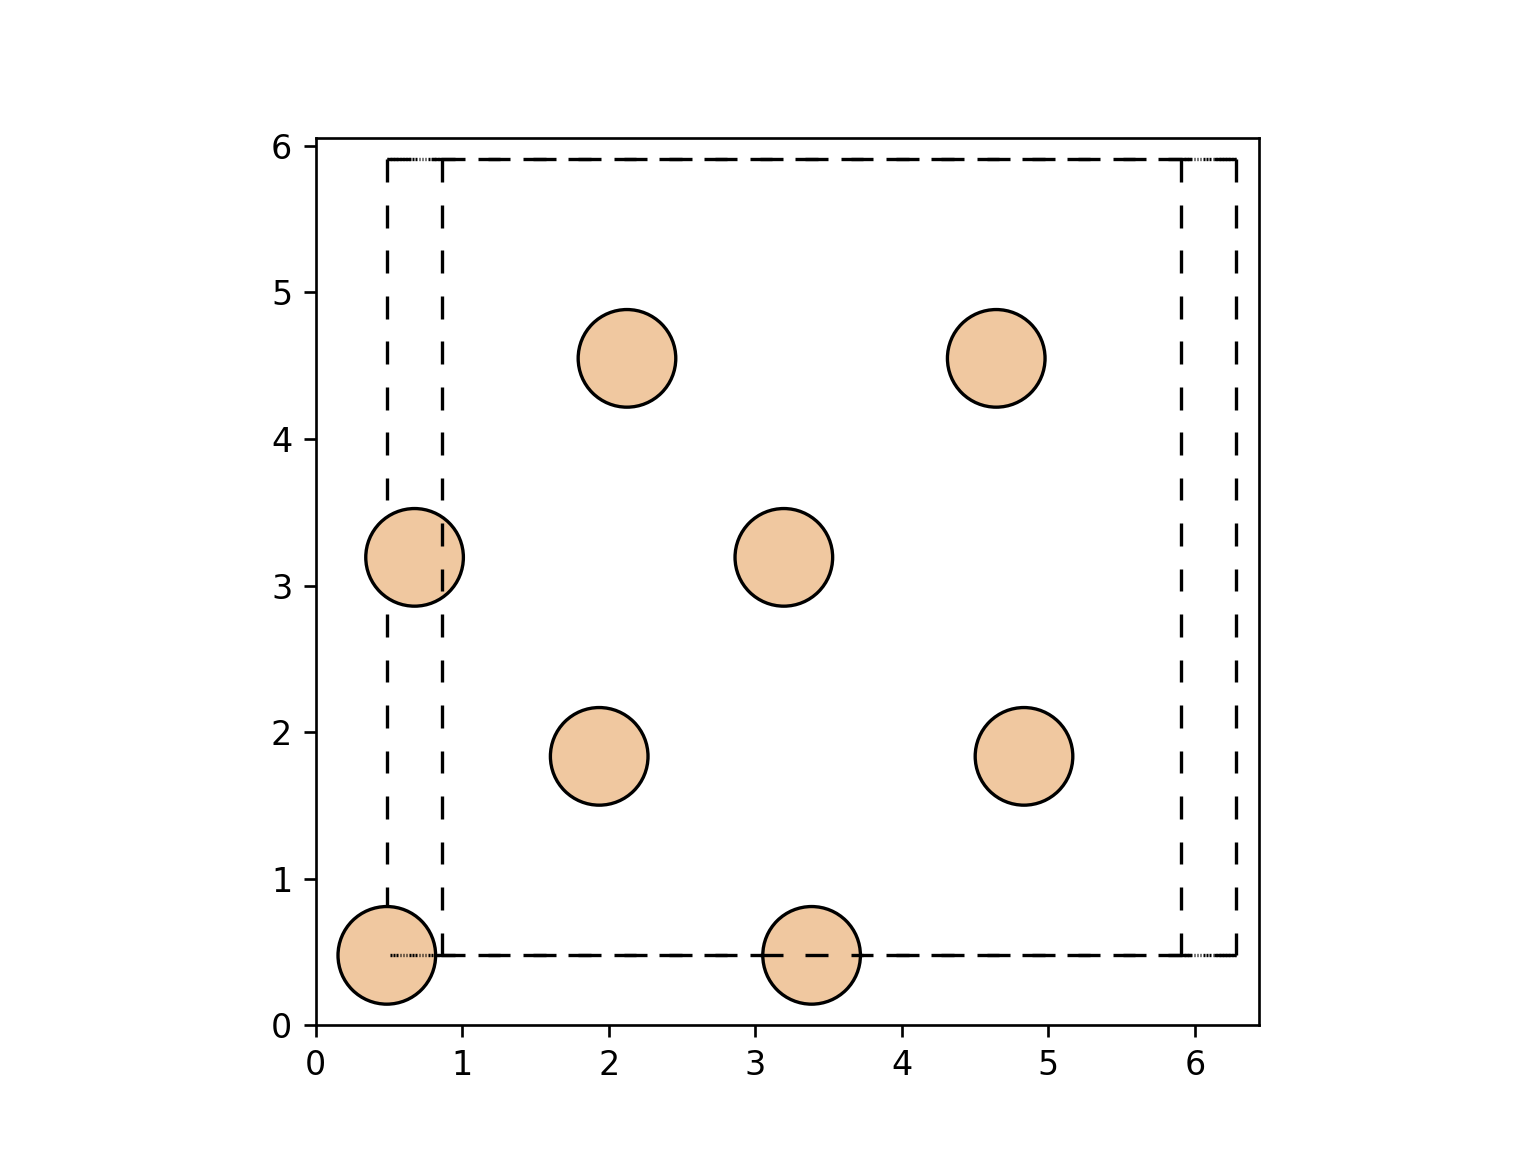

<AxesSubplot:>

In [4]:
from ase.visualize.plot import plot_atoms

plot_atoms(atoms, radii=0.3, rotation=('0x,4y,0z'))


## Parameters for Diffraction Calculation


In [5]:
tags = {}
atoms.info['experimental'] = tags

tags['acceleration_voltage_V'] = 99 *1000.0 #V

tags['convergence_angle_mrad'] = 0

tags['zone_hkl'] = np.array([2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([0,0,0])  # mistilt in degrees

tags['Sg_max'] = .01 # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 36   # Highest evaluated Miller indices


## Kinematic Scattering Calculation

In [6]:
ks.kinematic_scattering(atoms, False)

done


### Plot Selected Area Electron Diffraction Pattern

<IPython.core.display.Javascript object>


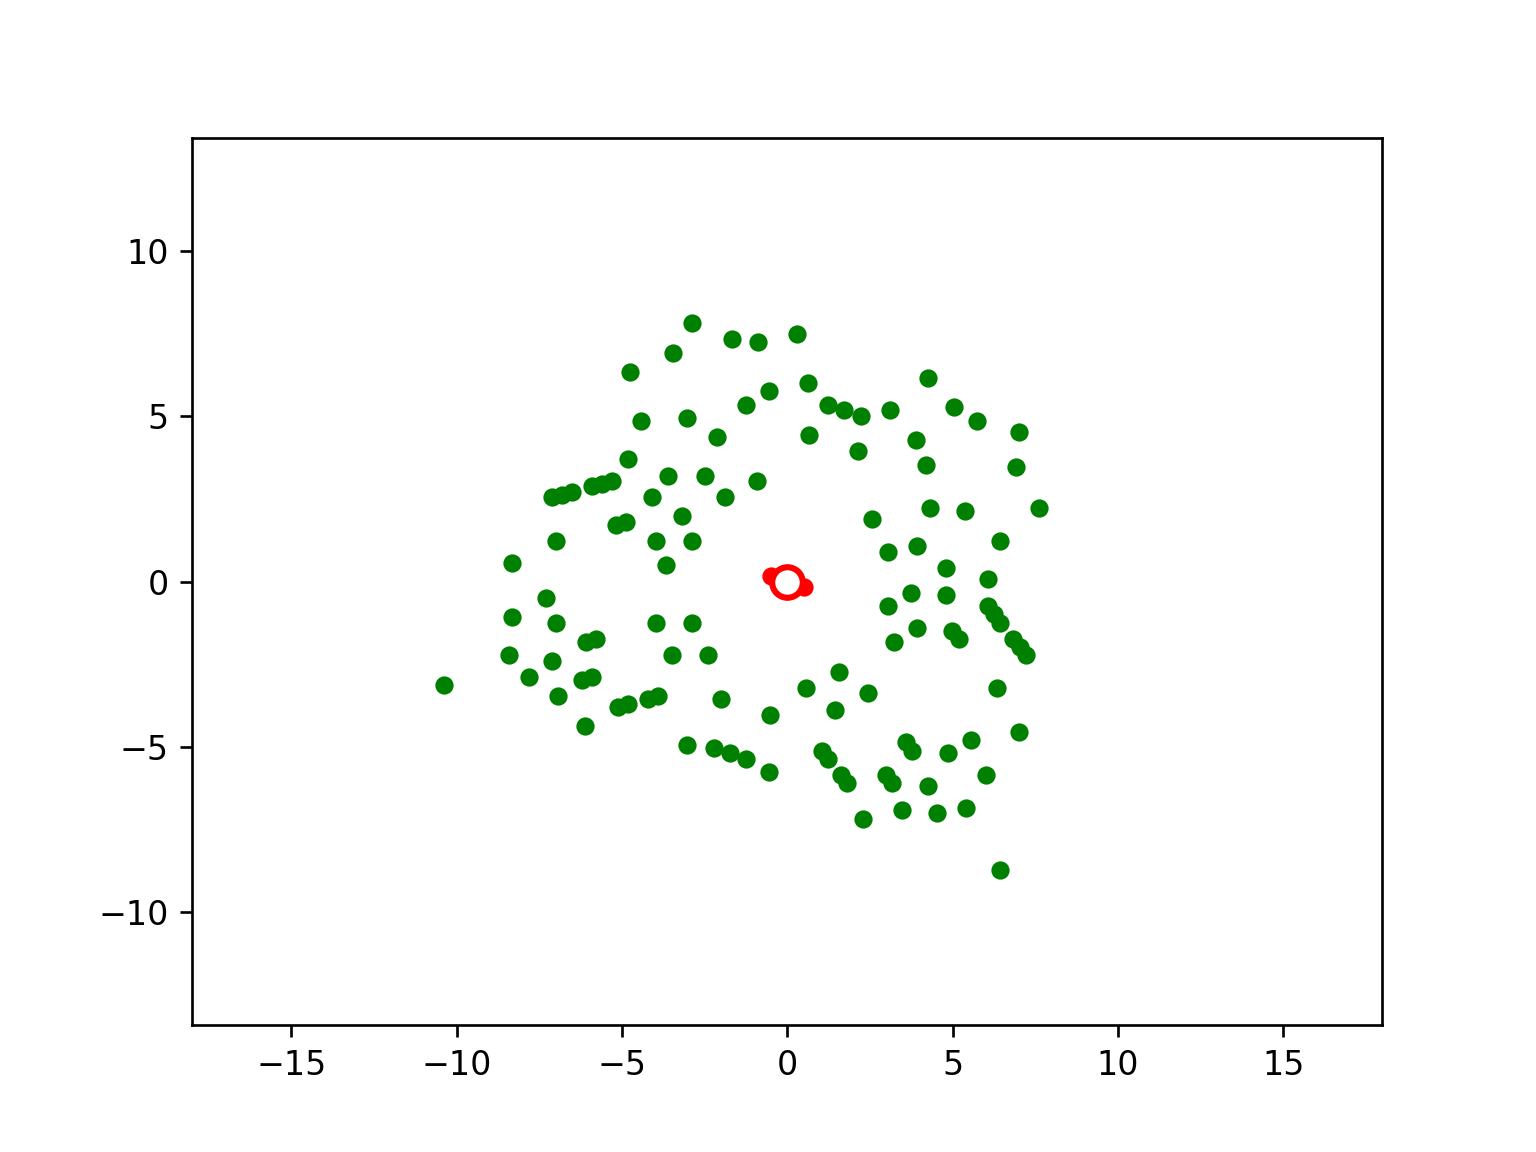

In [7]:
#####################
# Plot ZOLZ SAED Pattern #
#####################

## Get information as dictionary
tagsD = atoms.info['diffraction']

#We plot only the allowed diffraction spots
points = tagsD['allowed']['g']
# we sort them by order of Laue zone
ZOLZ = tagsD['allowed']['ZOLZ']
HOLZ = tagsD['allowed']['HOLZ']

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
# We plot the x,y axis only; the z -direction is set to zero - this is our projection
ax.scatter(points[ZOLZ,0], points[ZOLZ,1], c='red', s=20)
ax.scatter(points[HOLZ,0], points[HOLZ,1], c='green', s=20)

# zero spot plotting
ax.scatter(0,0, c='red', s=100)
ax.scatter(0,0, c='white', s=40)

ax.axis('equal')
FOV = 18
plt.ylim(-FOV,FOV); plt.xlim(-FOV,FOV); plt.show()

<IPython.core.display.Javascript object>


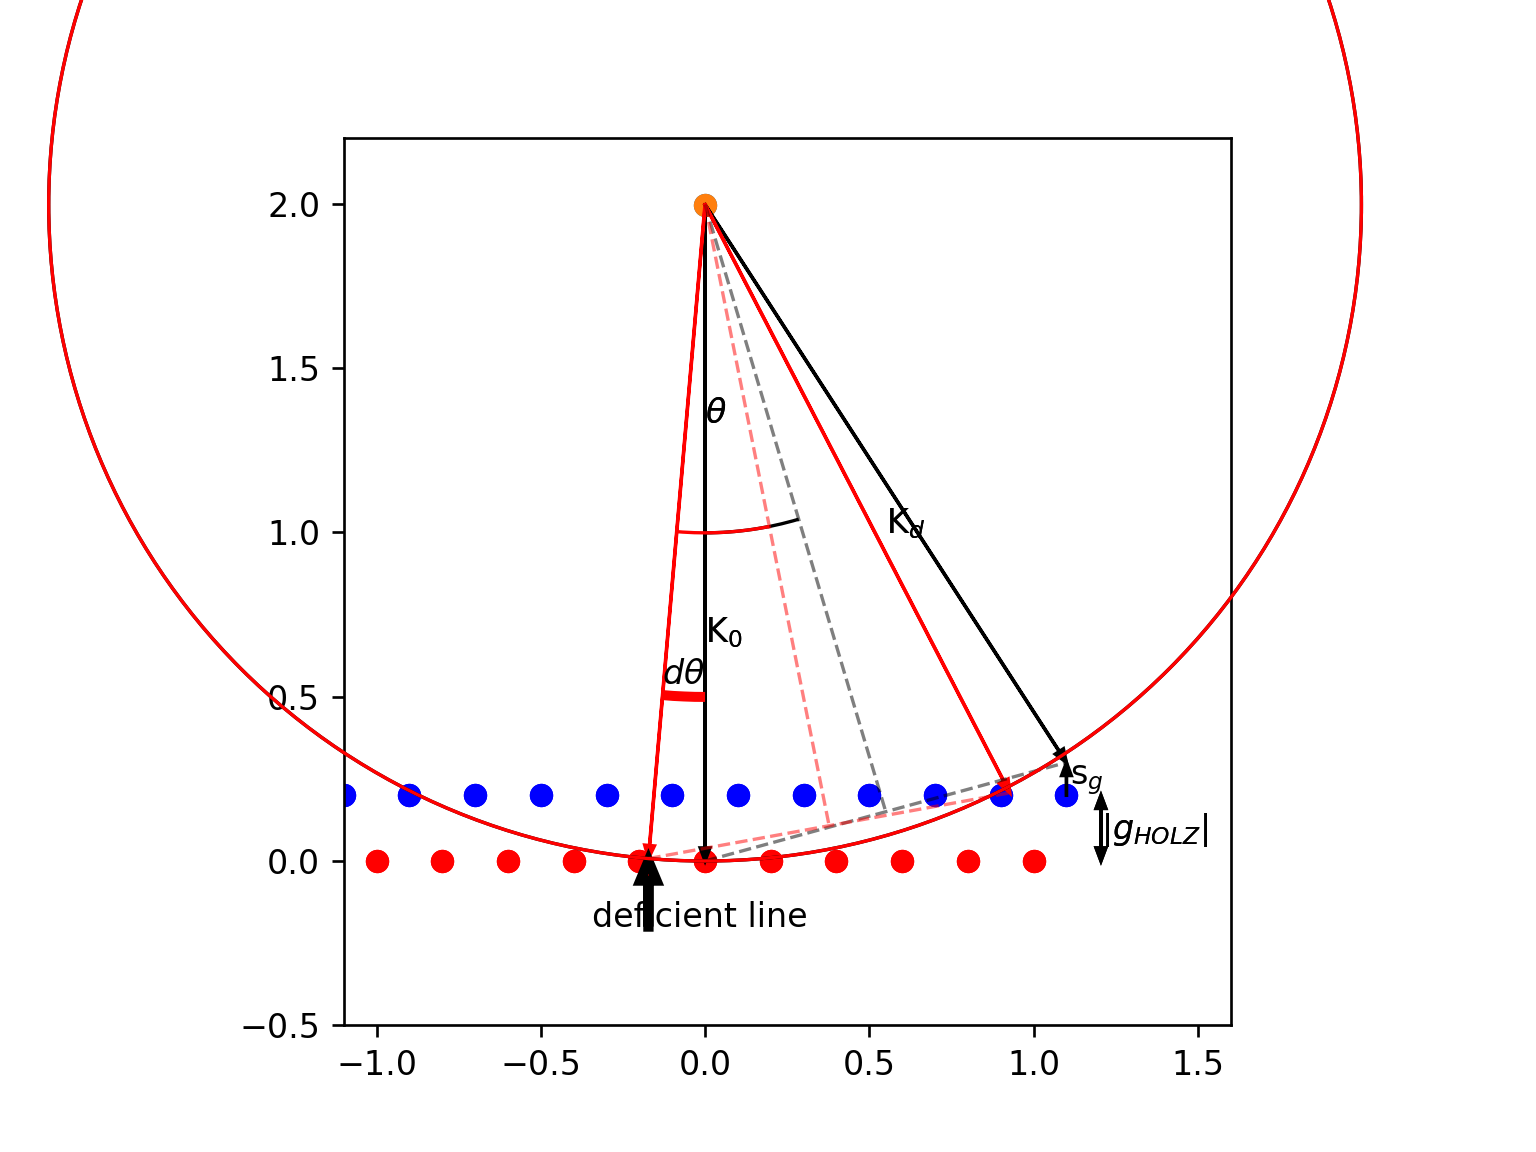

In [8]:
import pyTEMlib.animation  as animate

plt.figure()
animate.deficient_holz_line(exact_bragg=False, laue_zone=1)
# animate.deficient_holz_line(exact_bragg='True', laue_zone=1, color='blue')
animate.deficient_holz_line(exact_bragg='True', laue_zone=1, color='red', shift=True)


## HOLZ Line Construction


Position of deficient HOLZ line

### What is $d\theta$:
\begin{eqnarray*}		
    d\theta &+&(90-\theta_B)+ \varphi =  90\\
    d\theta  &=&  \theta_B -\varphi\\
    &&\\
    \sin(\theta_B) &=&|\vec{g}/2|/ |\vec{K}_0| \\
    \tan(\phi) &=& |\vec{g}_{HOLZ}|/|\vec{g}-\vec{g}_{HOLZ}|\\
    &&\\
    |\vec{g}_{deficient}| &=& 2\sin(  d\theta/ 2 )* |\vec{K}_0|\\
\end{eqnarray*}
        
        
>For exact Bragg position in ZOLZ 
>
>$d\theta = \theta_B$  then $\vec{g}_{deficient} = -\vec{g}/2   $
            
            
$d\theta = \theta - \varphi$

with:

$\sin(\theta) =\frac{|\vec{g}|/2}{|\vec{K}_0| }$

$\sin(\varphi) = \frac{|\vec{g}_{\rm HOLZ}|}{|\vec{g}|}$

Because $d\theta$ is the same as $d \varphi$ we can now calculate the deficient HOLZ lines

\begin{eqnarray*}
				\vec{K}_{Bg} &=& ( (\vec{g}-\vec{g}_{HOLZ})/ |\vec{g}-\vec{g}_{HOLZ}|*|\vec{g}_{HOLZ}| \\
				&& + \vec{K}_{0}/|\vec{K}_{0}|*|\vec{g}-\vec{g}_{HOLZ}|)\\
				\vec{K}_{Bg} &=&(\vec{g}_{ZOLZ}/|\vec{g}_{ZOLZ}|*|\vec{g}_{HOLZ}|) \\
				&+&\vec{K}_{0}/|\vec{K}_{0}|*|\vec{g}-\vec{g}_{HOLZ}|)\\
				\vec{K}_{B} &=&	\vec{K}_{bg}/|\vec{K}_{Bg}|*\sqrt{|\lambda^2-g^2/4)}\\
				\vec{K}_d &=& -(\vec{g}/2+\vec{K}_B)\\
				\vec{g}_{deficient} &=& \vec{K}_{0}-\vec{K}_{d}\\
\end{eqnarray*}

>For exact Bragg position in ZOLZ 
>$\vec{B}=\vec{K}_{0}$  then $\vec{g}_{deficient} = \vec{g}/2$
>			
>	This is our Kikuchi line equation

In [9]:
 ks.get_rotation_matrix(atoms.info['experimental'])

array([[ 0.74535599,  0.        ,  0.66666667],
       [-0.59628479,  0.4472136 ,  0.66666667],
       [-0.2981424 , -0.89442719,  0.33333333]])

In [10]:
atoms.info['experimental']['nearest_zone_axes']
nearest = atoms.info['experimental']['nearest_zone_axes']
print('Next nearest zone axes are:')
for i in range(1, nearest['amount']):
    print(f"  {nearest[str(i)]['hkl']}: mistilt: {np.rad2deg(nearest[str(i)]['mistilt_alpha']):6.2f}, "
          f"{np.rad2deg(nearest[str(i)]['mistilt_beta']):6.2f}")

Next nearest zone axes are:
  [5. 5. 3.]: mistilt:   1.20,   4.40
  [5. 5. 2.]: mistilt:  -1.07,  -4.76


In [21]:
#Calculate angle between K0 and deficient cone vector
#For dynamic calculations K0 is replaced by Kg
K0 = np.linalg.norm(atoms.info['experimental']['incident_wave_vector'])
g_allowed = atoms.info['diffraction']['allowed']['g']
g_norm_allowed = np.linalg.norm(g_allowed, axis = 1)
dtheta = np.arcsin(g_norm_allowed/K0/2.)

np.arcsin(np.abs(g_allowed[:,2])/g_norm_allowed)

#calculate length of distance of deficient cone to K0 in ZOLZ plane

gd_length =2*np.sin((dtheta)/2 )*K0

#Calculate nearest point of HOLZ and Kikuchi lines

gd = g_allowed.copy()

gd[:,0] = -gd[:,0]*gd_length/g_norm_allowed

gd[:,1] = -gd[:,1]*gd_length/g_norm_allowed

gd[:,2] = 0.

###calculate and save line in Hough space coordinates (distance and theta)

slope = gd[:,0]/(gd[:,1]+1e-20)

distance = gd_length

theta = np.arctan(slope)

## Now everything together in a single cell

done


<IPython.core.display.Javascript object>


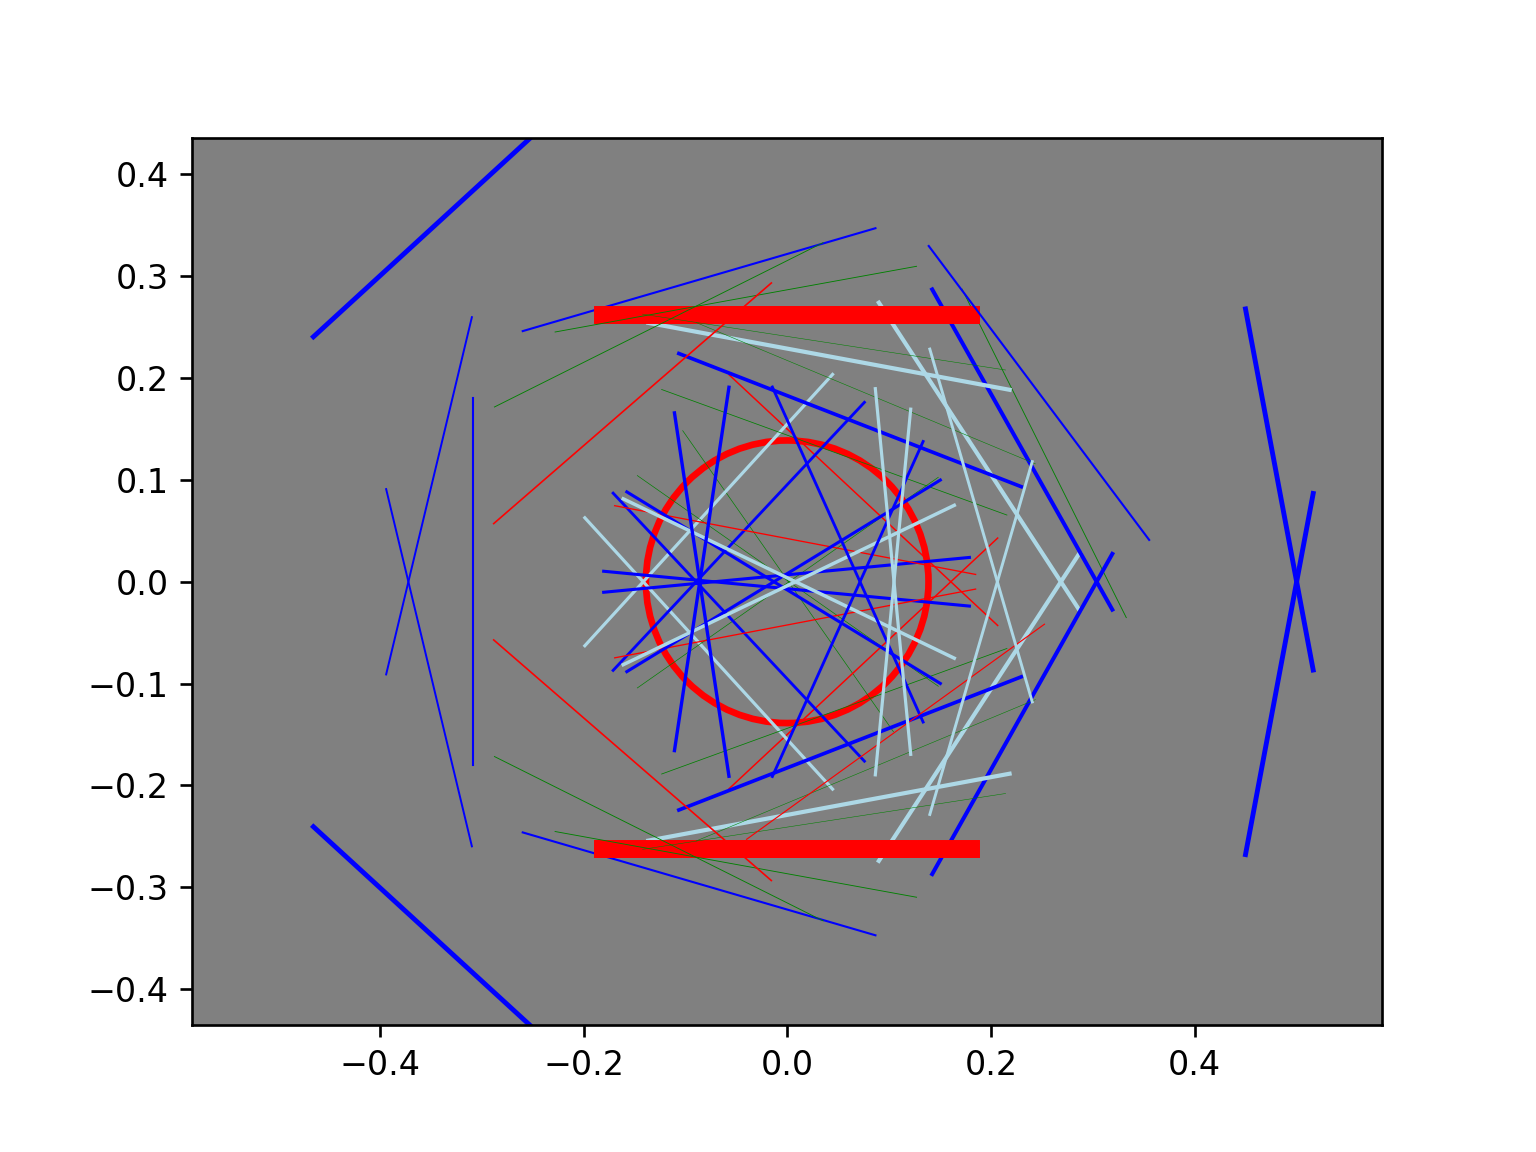

(-0.3, 0.3)

In [22]:
# ----- Input -----------
unit_cell_change_pm = -4.0
# -----------------------

atoms = ks.structure_by_name('silicon')
cell = atoms.cell.lengths()
atoms.set_cell(cell+unit_cell_change_pm/100, scale_atoms=True)
atoms

atoms.info['experimental'] = {'crystal_name': 'silicon',
                              'acceleration_voltage_V': 99.2*1000.0, #V
                              'convergence_angle_mrad': 5.,
                              'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
                              'hkl_max': 14,   # Highest evaluated Miller indices
                              'zone_hkl': np.array([1, 2, -2]),  
                              'mistilt_alpha degree': 0.,  # -45#-35-0.28-1+2.42
                              'mistilt_beta degree': 0.,
                              'plot_FOV': .5}

ks.kinematic_scattering(atoms)
atoms.info['output']=(ks.plotHOLZ_parameter())
atoms.info['output']['plot_reflections']=False
atoms.info['output']['plot_Kikuchi']=False
atoms.info['output']['linewidth_HOLZ'] = -1
atoms.info['output']['plot_HOLZ']=True


ks.plot_diffraction_pattern(atoms)


plt.gca().set_xlim(-.3,.3)
plt.gca().set_ylim(-.3,.3)

In [58]:
atoms = ks.structure_by_name('graphite')
atoms

Atoms(symbols='C4', pbc=False, cell=[[2.46772414, 0.0, 0.0], [-1.2338620699999996, 2.1371117947721068, 0.0], [0.0, 0.0, 6.711]])

## Now for graphite and low acceleration voltages.
Change the acceleration voltage and see what happens.

done


<IPython.core.display.Javascript object>


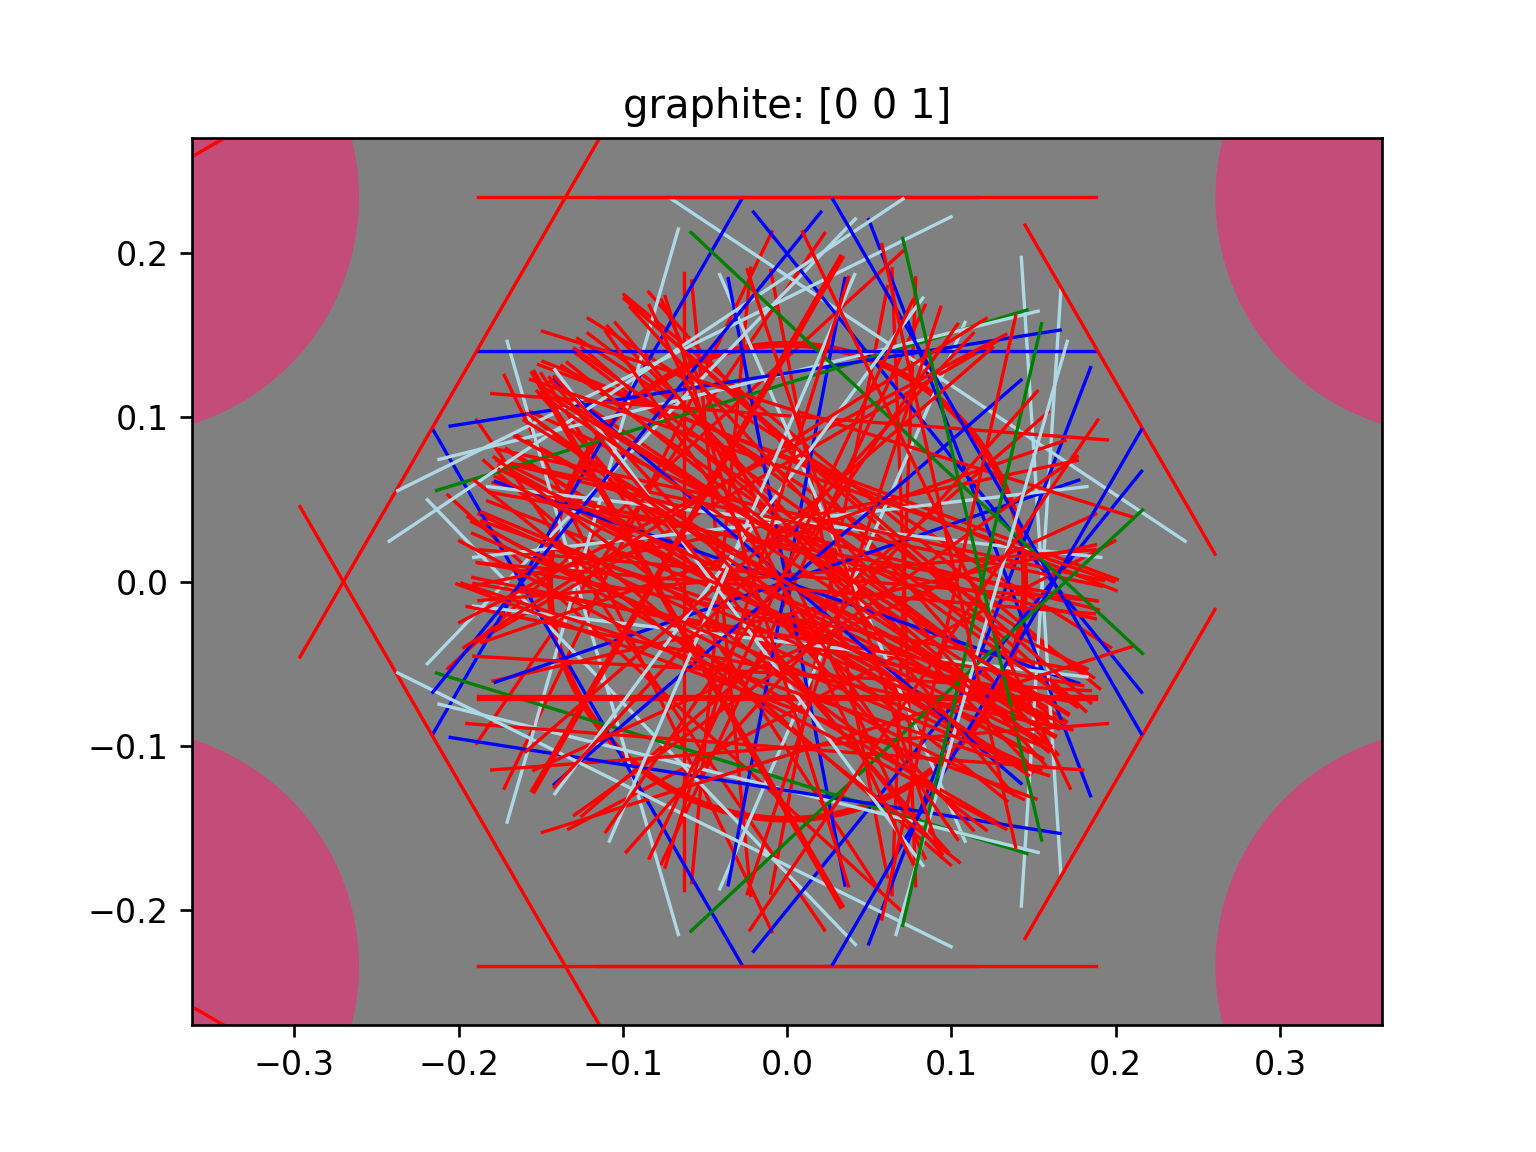

(-0.27, 0.27)

In [24]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO

# ----- Input -----------
crystal_name = 'graphite'
acceleration_voltage_V =  59.21 * 1000.0
# -----------------------

atoms = ks.structure_by_name(crystal_name)

atoms.info['experimental'] = {'crystal_name': crystal_name,
                              'acceleration_voltage_V': acceleration_voltage_V, #V
                              'convergence_angle_mrad': 7.,
                              'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
                              'hkl_max': 15,   # Highest evaluated Miller indices
                              'zone_hkl': np.array([0, 0, 1]),  
                              'mistilt_alpha degree': .0,  # -45#-35-0.28-1+2.42
                              'mistilt_beta degree': 0.,
                              'plot_FOV': .5}

ks.kinematic_scattering(atoms, verbose=False)
atoms.info['output']=(ks.plotHOLZ_parameter())
atoms.info['output']['plot_reflections']=True
atoms.info['output']['plot_Kikuchi']=False
atoms.info['output']['linewidth_HOLZ'] = 1
atoms.info['output']['plot_HOLZ']=True


ks.plot_diffraction_pattern(atoms)

plt.title(crystal_name + ': ' + str(atoms.info['experimental']['zone_hkl']))
plt.gca().set_xlim(-.27,.27)
plt.gca().set_ylim(-.27,.27)


## Navigation

- <font size = "3">  **Back: [Kikuchi Lines](CH2_10-Kikuchi_Lines.ipynb)** </font>
- <font size = "3">  **Next: [Lattice Determination with HOLZ](CH2_12-HOLZ_Example.ipynb)** </font>
- <font size = "3">  **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
